In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/philhoonoh/blob/main/self-introduction/self_intro_kor.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

```
💡 Colab Dark 모드 사용을 권장합니다
```

In [4]:
# !pip install transformers
# !pip install sentencepiece
# !pip install sentence-transformers
# !pip install krwordrank

# Self-Introduction with NLP Tasks
> psyduck 의 자기소개에 오신 것을 환영합니다.  
> 다양한 NLP task 들을 활용하여 자기소개를 하려고 합니다.  
> Huggingface Transformer, sentence-transformers, krwordrank 등의 다양한 패키지들을 활용합니다.   
- 🌍 kobart 을 활용한 자기소개 abstractive summariztion (자기 소개서 요약) 
- 🌍 kogpt 을 활용한 관심분야 generation (관심 분야 설명)  
- 🌍 sentencetransformer 을 활용한 cosine similarity (mbti 소개) 
- ⭐ bart-large-mnli 을 활용한 zero shot text classification (mbti 소개 심화) 
- 🌍 KRWordRankank - PageRank altorithm 를 통한 키워드 추출 keyword extraction (팀위크란 무엇일까?)  
- ⭐ vit 모델을 통한 image classfication (~~난 어떤 class 일까?~~) 


## 1. kobart 을 활용한 자기소개 abstractive summariztion (자기 소개서 요약)

```python
Naver 부스트캠프에 지원했던 자기소개서를 요약해보았습니다.
```

In [ ]:
import torch
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

tokenizer = PreTrainedTokenizerFast.from_pretrained('gogamza/kobart-summarization')
model = BartForConditionalGeneration.from_pretrained('gogamza/kobart-summarization')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
# text = 부스트캠프은 어떤 이유로 지원하셨나요? 에 대한 답변"

raw_input_ids = tokenizer.encode(text)
input_ids = [tokenizer.bos_token_id] + raw_input_ids + [tokenizer.eos_token_id]

summary_ids = model.generate(torch.tensor([input_ids]), max_length=50)
tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)

'AI에 열정을 지닌 다양한 분야의 분들이 모여 프로젝트를 진행하는 부스트캠프를 수료한 팀들의 github를 찾게 되면서 AI 엔지니어가 되기로 결심하게 되었다.'

```python
원문
을 요약시 
"AI에 열정을 지닌 다양한 분야의 분들이 모여 프로젝트를 진행하는 부스트캠프를 수료한 팀들의 github를 찾게 되면서 AI 엔지니어가 되기로 결심하게 되었다."
라고 요약이 됩니다!
```


## 2. kogpt 을 활용한 관심분야 generation (관심 분야 설명) 

```python

반가습니다! 여러가지 NLP 주제들에 관심이 있습니다, 
전반적으로는 Large-Scale Training, MLOps 등에 관심이 있구요. 
특히 NLP 분야에서는 MRC(Machine Reading Comprehension), ODQA(Open Domain Question Answering) 등에 흥미가 있습니다.  
최근에 참여한 프로젝트는 ODQA 분야 인데요. ODQA란...
```

## 🎉🎊🎉 Caution 🎉🎊🎉

KoGPT6B-ryan1.5b-float16 는 용량이 11.5G 입니다.   

COLAB P100, T4 (16G) 에서 inference 는 가능하네요

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM 

tokenizer = AutoTokenizer.from_pretrained(
  'kakaobrain/kogpt', revision='KoGPT6B-ryan1.5b-float16',  # or float32 version: revision=KoGPT6B-ryan1.5b
  bos_token='[BOS]', eos_token='[EOS]', unk_token='[UNK]', pad_token='[PAD]', mask_token='[MASK]'
)
model = AutoModelForCausalLM.from_pretrained(
  'kakaobrain/kogpt', revision='KoGPT6B-ryan1.5b-float16',  # or float32 version: revision=KoGPT6B-ryan1.5b
  pad_token_id=tokenizer.eos_token_id,
  torch_dtype='auto', low_cpu_mem_usage=True
).to(device='cuda', non_blocking=True)
_ = model.eval()


In [ ]:
prompt = 'ODQA(Open Domain Question Answering)에 관심이 있습니다. 최근에 참여한 프로젝트는 ODQA 분야 인데요. ODQA란 '
with torch.no_grad():
  tokens = tokenizer.encode(prompt, return_tensors='pt').to(device='cuda', non_blocking=True)
  gen_tokens = model.generate(tokens, do_sample=True, temperature=0.8, max_length=256)
  generated = tokenizer.batch_decode(gen_tokens)[0]
  
print(generated) 

ODQA(Open Domain Question Answering)에 관심이 있습니다. 최근에 참여한 프로젝트는 ODQA 분야 인데요. ODQA란 Open Domain Question Answering 의 약자로, 사용자들이 직접 다양한 영역의 ODQA (Open Domain Question Answering)에 질문을 올리고 답변을 찾아보는, 개방형 질문 답변 서비스 입니다.
현재 여러 ODQA 서비스가 있지만, 제가 관심을 갖고 있는 곳은 ODQA(Open Domain Question Answering) 입니다.
OpenDocqA (OnddocqA)는 최근에 열린 ODQA 커뮤니티의 중심에 설만큼 주목받고 있습니다.
오픈 데이터와 오픈 API를 통해 ODQA(Open Domain Question Answering)를 활성화 하고자 합니다.
현재 OpenDocqA(OpenDocqA)는 기존의 ODQA와는 완전히 다름니다. 기존 오픈 Data와 API의 확장에서 끝나는 것이 아닌, OpenDocqA(OpenDocqA)는 사용자에게 새로운 ODQA 경험을 제공하는


```python
첫번째 줄의 출력이 비교적 잘 설명되어 있습니다. 
"ODQA(Open Domain Question Answering)에 관심이 있습니다. 최근에 참여한 프로젝트는 ODQA 분야 인데요. ODQA란 Open Domain Question Answering 의 약자로, 사용자들이 직접 다양한 영역의 ODQA (Open Domain Question Answering)에 질문을 올리고 답변을 찾아보는, 개방형 질문 답변 서비스 입니다."
이로써 kogpt odqa에 대한 정보가 학습되어 있는 것을 알 수 있었습니다. 
```


## 3. sentencetransformer 을 활용한 cosine similarity (mbti 소개) 

```python
"""
반갑습니다. 
대학에서 통계학을 전공하고 졸업하고 회사에 입사해 NLP 관련 업무를 진행했습니다. 
이후 네이버 AI 부스트캠프 과정을 합격하여 좋은 동료들과 함께 과정을 수료하였습니다.  
"""
```
란 문장을 sentencetransformer 를 통해 mbti를 유추해보겠습니다. 

In [ ]:
import torch
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("Huffon/sentence-klue-roberta-base")

In [25]:
from collections import OrderedDict

mbti_dict = OrderedDict({
    "용의주도한 전략가" : 'INTJ',
    "논리적인 사색가" : 'INTP',
    "대담한 통솔자" : 'ENTJ',
    "뜨거운 논쟁을 즐기는 변론가" : 'ENTP',
    "선의의 옹호자" : 'INFJ',
    "열정적인 중재자" : 'INFP',
    "정의로운 사회운동가" : 'ENFJ',
    "재기발랄한 활동가" : 'ENFP',
    "청렴결백한 논리주의자" : 'ISTJ',
    "용감한 수호자" : 'ISFJ',
    "엄격한 관리자" : 'ESTJ',
    "사교적인 외교관" : 'ESFJ',
    "만능 재주꾼" : 'ISTP',
    "호기심 많은 예술가" : 'ISFP',
    "모험을 즐기는 사업가" : 'ESTP',
    "자유로운 영혼의 연예인" : 'ESFP'
})

mbti_keys = list(mbti_dict.keys())

mbti_embeddings = model.encode(mbti_keys)

query = "반갑습니다. 대학에서 통계학을 전공하고 졸업하고 회사에 입사해 NLP 관련 업무를 진행했습니다. 이후 네이버 AI 부스트캠프 과정을 합격하여 좋은 동료들과 함께 과정을 수료하였습니다.  "
query_embedding = model.encode(query)

cos_scores = util.pytorch_cos_sim(query_embedding, mbti_embeddings)[0]
result = torch.argsort(cos_scores, descending = True)

for i, (score, idx) in enumerate(zip(cos_scores, result)):
    print(f"{i+1}: {mbti_dict[mbti_keys[idx]]} {'(cosine similarity: {:.4f})'.format(cos_scores[idx])}")


1: ESTP (cosine similarity: 0.1907)
2: INFP (cosine similarity: 0.1557)
3: INTJ (cosine similarity: 0.1465)
4: ESFJ (cosine similarity: 0.1383)
5: ENFP (cosine similarity: 0.1377)
6: ENTP (cosine similarity: 0.1366)
7: ISFP (cosine similarity: 0.1191)
8: ISTJ (cosine similarity: 0.1128)
9: INFJ (cosine similarity: 0.1040)
10: ISTP (cosine similarity: 0.0901)
11: INTP (cosine similarity: 0.0764)
12: ENFJ (cosine similarity: 0.0517)
13: ISFJ (cosine similarity: 0.0492)
14: ENTJ (cosine similarity: 0.0245)
15: ESTJ (cosine similarity: -0.0405)
16: ESFP (cosine similarity: -0.0426)


```python
"""
반갑습니다. 대학에서 통계학을 전공하고 졸업하고 회사에 입사해 NLP 관련 업무를 진행했습니다. 이후 네이버 AI 부스트캠프 과정을 합격하여 좋은 동료들과 함께 과정을 수료하였습니다.  
"""
위 문장을 적은 사람의 MBTI 는 INTP 인데, cosine 유사도가 매우 낮습니다. 아마 아래와 같은 이유들로 인해 mbti를 분류하기에는 한계가 있는 것 같습니다.  

    - 첫번째로, mbti에 대해 훈련을 진행한 것이 아니란점.
    - 두번째로, 유형별 mbti 에 대한 설명도 매우 적다는점.
    - 세번째로, query 또한 유형에 해당하는 사항이 거의 없는 점.

데이터가 충분할 경우 classification task로 다시 시도해 볼 수 있을 것 같습니다. 
하지만 아래와 같이 zero-shot classification으로 시도를 해보았습니다.
```

In [27]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", device=0)
eng_mbti_dict = OrderedDict({
    "A thoughtful strategist" : 'INTJ',
    "A logical thinker" : 'INTP',
    "Bold leader" : 'ENTJ',
    "A lawyer who enjoys a heated debate" : 'ENTP',
    "Advocate of good faith" : 'INFJ',
    "A passionate mediator" : 'INFP',
    "Righteous social activist" : 'ENFJ',
    "A cheerful activist." : 'ENFP',
    "Integrity, integrity, logicist" : 'ISTJ',
    "Brave defender" : 'ISFJ',
    "Strict manager" : 'ESTJ',
    "Sociable diplomat" : 'ESFJ',
    "He's so talented." : 'ISTP',
    "A curious artist" : 'ISFP',
    "A businessman who enjoys adventures" : 'ESTP',
    "A free-spirited celebrity" : 'ESFP'
})

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [30]:
sequences = [
    "After graduating from college after majoring in statistics, I happened to encounter the Naver Boost Camp course. After passing the exam, I became a boost camper because I thought this was the time, and I met good team members and am happily spending the boost camp process",
]

eng_mbti_keys = list(eng_mbti_dict.keys())
candidate_labels = eng_mbti_keys
hypothesis_template = "Aforementioned person can be described as {}."

result = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)

In [34]:
for i, (score, label) in enumerate(zip(result[0]['scores'], result[0]['labels'])):
    print(f"{i+1}: {eng_mbti_dict[label]} {'(zero shot score: {:.4f})'.format(score)}")


1: INFJ (zero shot score: 0.2210)
2: ENTJ (zero shot score: 0.1575)
3: INTJ (zero shot score: 0.1202)
4: ESFJ (zero shot score: 0.0871)
5: INTP (zero shot score: 0.0744)
6: INFP (zero shot score: 0.0594)
7: ESTP (zero shot score: 0.0439)
8: ISTJ (zero shot score: 0.0409)
9: ISFJ (zero shot score: 0.0390)
10: ENFJ (zero shot score: 0.0326)
11: ISFP (zero shot score: 0.0312)
12: ESFP (zero shot score: 0.0287)
13: ESTJ (zero shot score: 0.0220)
14: ENFP (zero shot score: 0.0191)
15: ISTP (zero shot score: 0.0190)
16: ENTP (zero shot score: 0.0040)


```python
hypothesis_template 제외한, mbti에 대한 description은 Papago를 통해 영어로 번역했습니다. 
zero-shot classification 으로 inference 시 sentencetransformer의 cosine score 보다 나은 성능을 보여줍니다. (11 -> 5)
```

## 4.  KRWordRankank - PageRank altorithm 를 통한 키워드 추출 keyword extraction (팀위크란 무엇일까?)  

```python
팀워크에 대한 저의 생각은 아래와 같습니다. 
"""
팀워크는
 매우 중요하다고 생각합니다. 개발자로서의 최고의 칭찬은 '코딩을 잘하는 사람' 보다는 '누구나 같이 일하고 싶은 사람' 이라고 생각합니다.  
여러 사람들과 함께 코드를 수정하고 버그를 개선하는 오픈소스의 기본 이념처럼 다양한 분야의 사람들과 협업을 하며 재미있게 프로젝트를 진행하면 좋겠습니다!  
"""
이에 팀워크에 대해 설명한 document에 대해 키워드 추출를 해보았ㅅ브니다.
```

In [3]:
team_work_text = ["""건강한 팀워크는 “서로를 위해 일하는 것이 아니라 서로 함께 일하는 것”이라는 말이 있습니다. 이 말은 팀원들이 각자 독립적인 존재로 함께 일하는 것이 아닙니다. 오히려 그 반대로, 서로가 서로를 책임지는 관계 속에서 팀 전체의 목표를 이루기 위해 함께 일하는 것을 의미합니다. 그런데 이런 팀워크는 결코 어떠한 외적인 조건에 의해서 주어지는 것이 아닙니다. 존 맥스웰은 서로를 책임지는 팀워크를 만들기 위해서는 다음의 다섯 가지 요소가 반드시 필요하다고 주장합니다.
1. 인격
‘신뢰’가 리더십의 기초이며, 모든 ‘신뢰’는 인격에서부터 비롯된다는 것은 이미 주지의 사실입니다. 마찬가지로 책임은 인격과 함께 시작되는데, 왜냐하면 책임은 모든 인간 관계의 기초인 신뢰에 근거하고 있기 때문입니다. 당신이 어떤 사람을 신뢰할 수 없다면 당신은 그를 의존할 수 없듯이, 서로를 책임지는 팀워크를 만들기 위해 당신이 가장 먼저 해야 할 일은 팀원 개인의 인격을 세우는 일입니다.
2. 능력
종종 ‘인격’만 훌륭하면 된다고 착각하는 사람들이 있습니다. 하지만 공동의 목표를 갖고 있는 팀에서는 개개인의 능력 또한 매우 중요한 요소입니다. 인격이 가장 중요한 요소임에는 분명하지만 유일한 요소는 아닙니다. 인격 만큼이나 능력도 서로를 책임지는 팀워크에 중요한 요소입니다. 어떤 사람과 같은 팀이 된다면, 당신은 분명 그 사람의 인격과 함께 능력도 볼 것입니다.
3. 헌신
자신에게 유리할 때만 좋게 대하는 사람과는 팀을 이루기 어렵습니다. 반대로 팀을 위해 헌신할 줄 아는 태도를 가진 사람은 누구나 그와 함께 팀을 이루고 싶어 합니다. ‘헌신’의 태도는 인격에서 비롯되는 것으로, 팀 전체를 보는 눈과 그것을 위해 자신을 바칠 줄 아는 자세를 말합니다. 팀의 성공과 실패는 팀 동료들간의 헌신의 정도에 비례한다고 말할 수도 있습니다.
4. 일관성
서로를 책임지는 팀워크를 만들기 위해 필요한 또 하나의 요소는 바로 일관성 있는 태도입니다. 일관성이란 예측 가능하며, 신뢰할 수 있는 근거가 되는 요소입니다. 여기서 일관성이란 긍정적이고 팀에 유익한 방향을 의미하며, 한 두 번이 아니라 반복적으로 그 모습을 보여주는 것을 의미하고, 어떠한 원칙에 대하여 상황에 따라 바꾸지 않는 태도를 의미합니다.
5. 단합
단합은 아무리 어려운 상황이 닥쳐도 함께 뭉칠 수 있는 능력을 말합니다. 단합은 서로 좋아하고 서로 잘해 주는 그런 것이 아닙니다. 서로 좋아하고 서로에게 매너 있게 잘해 주지만 단합되지는 않는 팀이 있습니다. 그런 팀은 팀원들이 그저 조직원에 불과한 팀입니다. 단합은 서로에 대한 신뢰의 정도를 보여줍니다. 단합이 잘되는 팀은 어떠한 상황에서도 흔들리거나 나뉘지 않습니다.
팀워크와 관련해서 당신이 받을 수 있는 최상의 칭찬은 중요한 시기에 당신의 팀 동료들로부터 ‘믿을 수 있다’는 이야기를 듣는 것입니다. 당신의 팀 동료들은 당신을 필요로 할 때에 당신을 믿어줍니까? 서로를 책임지는 팀워크를 만들기 위해 당신의 인격에는 문제가 없는지, 당신은 주어진 업무를 제대로 완수하고 있는지, 팀의 성공을 위해 당신 자신을 헌신하는지, 어느 때라도 믿을 수 있는 일관성을 보여주었는지, 그리고 다른 팀원들과 하나가 되었는지 점검해보십시오. 그리고 다른 사람이 아닌, 바로 당신 자신의 모습에서 고쳐야 할 부분이 무엇인지 찾아 보십시오. 그것을 고치기 위해 노력할 때, 당신이 속한 팀은 서로를 책임지는 팀워크를 갖추게 될 것입니다.
본 글은 존 맥스웰 저 <팀워크를 혁신하는 17가지 불변의 법칙> 중에서 발췌, 각색하였습니다
"""]

In [4]:
from krwordrank.word import KRWordRank

min_count = 2   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)

In [5]:
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10
keywords, rank, graph = wordrank_extractor.extract(team_work_text, beta, max_iter)

In [6]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      서로:	4.2142
      위해:	3.5016
    책임지는:	3.2165
      인격:	2.6769
    팀워크를:	2.3996
      함께:	2.3898
      것이:	2.3862
      당신:	2.3353
      있는:	2.3194
     중요한:	2.0437
     만들기:	1.6864
     그리고:	1.6589
      것을:	1.6488
      팀의:	1.6261
      팀은:	1.5213
      모든:	1.5137
     단합은:	1.4131
      어떤:	1.3965
     그것을:	1.3170
      다른:	1.2901
      사람:	1.2782
      능력:	1.2737
      팀이:	1.2684
     일관성:	1.2285
     태도를:	1.2015
      팀을:	1.1817
  요소입니다.:	1.1461
     어떠한:	1.1138
      자신:	1.0092
      그런:	1.0032


```python
서로, 위해, 책임지는, 인격 등 단어들이 추출 되는 것을 보실 수 있습니다. 
나중에는 사전을 만들어서 정의된 단어들을 추출하면 더 좋은 성능을 보여줄수 있을 것이라 기대합니다.  
```

## 5. vit 모델을 통한 image classfication (~~난 어떤 class 일까?~~)   


```python
위에서 보여드린 abstractive summariztion, generation, document search, keyword extraction 등등에 관심을 가지고 있고, 코드를 조금 활용할 수 있습니다. 
Vit를 사용하여 맨 위의 프로필을 분석해 보겠습니다.
```

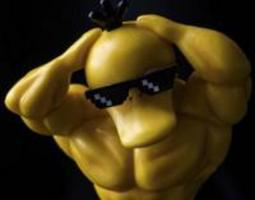

In [3]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
import urllib

# 파덕이미지 다운 
# url = 'https://i.imgur.com/Q7TFJNL.jpg?2'
# urllib.request.urlretrieve(url, "./image.jpg")
# image = Image.open("./image.jpg")
# image

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits


In [7]:
socre_lst = torch.squeeze(logits, dim = 0).tolist()
predicted_class_lst = torch.squeeze(logits.argsort(descending = True), dim = 0).tolist()

In [8]:
top_k = 5

for idx, predicted_class_idx in enumerate(predicted_class_lst):
    print(f'{idx+1} - {model.config.id2label[predicted_class_idx]} - {socre_lst[predicted_class_idx]}')
    if idx + 1 == top_k:
        break

1 - sunglass - 7.656715393066406
2 - can opener, tin opener - 6.420529365539551
3 - comic book - 6.390258312225342
4 - sunglasses, dark glasses, shades - 5.738419055938721
5 - corkscrew, bottle screw - 5.577491283416748



```python
프로필을 Vit로 image classification 시 sunglass라고 inference 합니다.  
image detection 으로 프로필을 분석할 수도 있을 것 같습니다.
```